##Defry Hamdhana
###Submission for Belajar Machine Learning untuk Pemula

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2021-04-30 01:45:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  1.39MB/s    in 4m 10s  

2021-04-30 01:49:48 (1.23 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os

In [4]:
#extract zip to /tmp folder
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
#choose folder for being a dataset
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [6]:
os.listdir(base_dir)

['scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [7]:
len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock'))

726

In [8]:
len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper'))

712

In [9]:
len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors'))

750

In [10]:
#make a train directory
train_dir = os.path.join(base_dir, 'train')

#make a test directory
test_dir = os.path.join(base_dir, 'val')

In [11]:
#make directory train_dir and test_dir
if not os.path.exists(train_dir):os.mkdir(train_dir)
if not os.path.exists(test_dir):os.mkdir(test_dir)

In [12]:
#makes variable for 3 object
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')

#devide it into test_set = 40%
train_rock_dir, test_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4 )
train_paper_dir, test_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4 )
train_scissors_dir, test_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [13]:
#make 3 folder train_set for each action
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')


#make 3 folder test_set for each action
test_rock = os.path.join(test_dir, 'rock')
test_paper = os.path.join(test_dir, 'paper')
test_scissors = os.path.join(test_dir, 'scissors')

In [14]:
#make train folder for every act
if not os.path.exists(train_rock):os.mkdir(train_rock)
if not os.path.exists(train_paper):os.mkdir(train_paper)
if not os.path.exists(train_scissors):os.mkdir(train_scissors)

#make test folder for every act
if not os.path.exists(test_rock):os.mkdir(test_rock)
if not os.path.exists(test_paper):os.mkdir(test_paper)
if not os.path.exists(test_scissors):os.mkdir(test_scissors)

In [18]:
import shutil

#copy train data to each new folder
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

#copy test data to each new folder
for i in test_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(test_rock, i))
for i in test_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(test_paper, i))
for i in test_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(test_scissors, i))

In [19]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [22]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
    target_size=(100,150),
    shuffle=True,
    batch_size=32,
    class_mode='categorical')
 
test_generator = train_datagen.flow_from_directory(
  test_dir,
    target_size=(100,150),
    shuffle=False,
    batch_size=32,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(
  train_generator,
  steps_per_epoch=25,
  epochs=20,
  validation_data=test_generator,
  validation_steps=5,
  verbose=2
)

Epoch 1/20
25/25 - 12s - loss: 1.0935 - accuracy: 0.4575 - val_loss: 0.4041 - val_accuracy: 0.9812
Epoch 2/20
25/25 - 11s - loss: 0.7042 - accuracy: 0.7212 - val_loss: 0.4917 - val_accuracy: 0.8188
Epoch 3/20
25/25 - 11s - loss: 0.3568 - accuracy: 0.8637 - val_loss: 0.5569 - val_accuracy: 0.8313
Epoch 4/20
25/25 - 11s - loss: 0.3288 - accuracy: 0.8913 - val_loss: 0.3897 - val_accuracy: 0.8813
Epoch 5/20
25/25 - 11s - loss: 0.2126 - accuracy: 0.9350 - val_loss: 0.7555 - val_accuracy: 0.7188
Epoch 6/20
25/25 - 11s - loss: 0.2329 - accuracy: 0.9275 - val_loss: 0.2199 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 11s - loss: 0.1636 - accuracy: 0.9575 - val_loss: 0.3843 - val_accuracy: 0.8562
Epoch 8/20
25/25 - 11s - loss: 0.1983 - accuracy: 0.9275 - val_loss: 0.2671 - val_accuracy: 0.9125
Epoch 9/20
25/25 - 11s - loss: 0.1672 - accuracy: 0.9425 - val_loss: 0.3822 - val_accuracy: 0.8625
Epoch 10/20
25/25 - 11s - loss: 0.1705 - accuracy: 0.9388 - val_loss: 0.1431 - val_accuracy: 0.9625
Epoch 11/

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving 5kJec3v9txvrAb4g.png to 5kJec3v9txvrAb4g.png
5kJec3v9txvrAb4g.png
paper


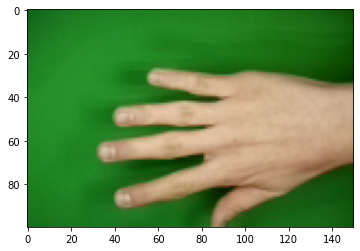

In [27]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')